In this problem we consider a simulated dataset of data that might be collected by a gamma telescope observing high energy particles.  We use a Gaussian classification model to detect the presence of an event.  The data is denoted by $x_{nd}$ and has two classes $k=0, 1$ with labels $y_{nk}$. 

<b>1.a)</b> Write down an equation for the joint log-likelihood under a Naive Bayes model where every feature is an independent Gaussian with mean $\mu_{kd}$ and variance $\sigma_{kd}^2$, for the two classes $k=0, 1$.  Denote the marginal probability of class $k$ by $\pi_k$.

<b> Sol:</b>
$$
p (x, y) = \prod_{n} \prod_{d} \sum_{k=0, 1} \mathbb{1}_{\{ y_{nk}=1 \}} \pi_k \frac{1}{ \sqrt{2 \pi \sigma_{kd}^2 }} \exp \left( - \frac{(x_{nd} - \mu_{kd} )^2}{2 \sigma_{kd}^2} \right)
$$

<b>1.b)</b> Find the MLE of the above equation.

<b> Sol. </b> The MLE  $\hat{\mu}_k$ and $\hat{\sigma}_k$ are given by the sample mean and variance of the training examples in each class $k=0, 1$.  The MLE $\hat{\pi}$ is the fraction of samples in each class.

<b>1.c)</b> Implement this parameter estimation, and compute and plot a ROC curve on the test data.

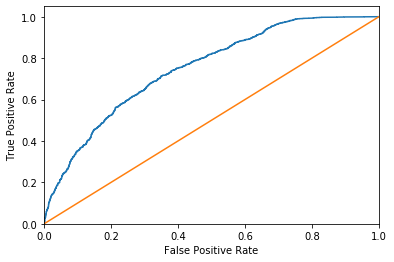

In [38]:
import numpy as np
from scipy.io import loadmat
import imp
import hw3
import matplotlib.pyplot as plt
imp.reload(hw3)
data = loadmat('gamma.mat')
gammaClassifier = hw3.gaussianClassifier(data, k=2)
gammaClassifier.fit()
gammaClassifier.roc()

<b>1.d)</b> Assume that the rates of positives is the same in the test data as the training data.  Find the Bayes optimal classifier and its true and false positive rates.

<b> Sol.</b> The Bayes optimal classifier predicts class $1$ iff $\pi_1 p (x_n | y_{n1}=1 ) > \pi_0 p (x_n | y_{n0} =1 )$.

In [39]:
gammaClassifier.reportRates(gammaClassifier.pi)

TPR: 0.9109 FPR: 0.6354


<b>1.e</b> Suppose that the frequencies of positive and negative classes are as before, but it is 50 times more costly to classify signals (true cases) as backgrounds.  What are the TPR and FPR of the optimal classifier for this decision rule?

In [40]:
weights = gammaClassifier.pi + np.array([0, np.log(50)])
gammaClassifier.reportRates(weights)

TPR: 0.9476 FPR: 0.6748


In the next problem we re-use the Gaussian classifier on the MNIST dataset from the first problem set.  

<b>2a)</b> Use the code from the previous problem to fit ML estimates for a Gaussian classifier distinguishing between the digits $\{ 1, 2, 7\}$.  To avoid numerical problems, threshold variances to be a minumum of $10^{-6}$. Plot the mean and variance of each class as images.

In [41]:
#Load data:
dataRaw = loadmat('mnist_all.mat')
dataDigits = {}
dataDigits['train'] = np.vstack((dataRaw['train1'][0:200,:],dataRaw['train2'][0:200,:],dataRaw['train7'][0:200,:] ))
dataDigits['trainLabels'] = np.hstack((np.zeros(200), np.ones(200), np.ones(200)+np.ones(200)))
dataDigits['test'] = np.vstack((dataRaw['test1'],dataRaw['test2'],dataRaw['test7'] ))
dataDigits['testLabels'] = np.hstack((np.zeros(dataRaw['test1'].shape[0]), np.ones(dataRaw['test2'].shape[0]), 2*np.ones(dataRaw['test7'].shape[0])))
dataDigits['trainLabels'] = np.reshape(dataDigits['trainLabels'], (len(dataDigits['trainLabels']), 1))
#Fit a classifier:
dC = hw3.gaussianClassifier(dataDigits, k=3)
dC.threshold = 0.000001
dC.fit()

Mean and variance of digit  1


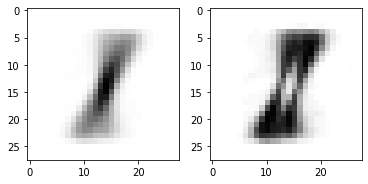

Mean and variance of digit  2


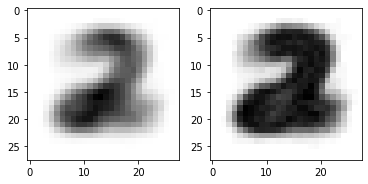

Mean and variance of digit  7


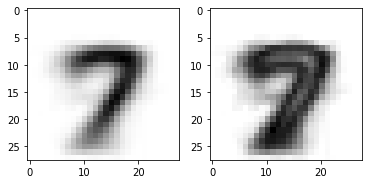

In [42]:
imp.reload(hw3)
#Plot means:
digit_list = [1, 2, 7]
for i in range(3):
    print('Mean and variance of digit ', digit_list[i])
    hw3.plot2(dC.mu[i, :], dC.sigmaSq[i, :])

<b>2b)</b> What is the classification accuracy of this classifier on the test data?

In [43]:
acc = dC.accuracy(dC.predict(dC.xTest, 1), dC.yTest)
print('Accuracy: '+'{:.4f}'.format(acc))

Accuracy: 0.9330


<b>2c)</b> Consider a constrained model where the features are constrained to have the same variance $\sigma_{kd}^2 = \sigma_k^2$.  What is the classification accuracy of this classifier?

In [44]:
dC2 = dC
dC2.sigmaSq = np.einsum('i, j', np.mean(dC2.sigmaSq, axis=1), np.ones(dC2.sigmaSq.shape[1]))
print('Accuracy:'+'{:.4f}'.format(dC2.accuracy(dC2.predict(dC2.xTest,1), dC2.yTest)))

Accuracy:0.9283


<b>2d)</b> Consider an extremely simple classifier that measures the distance between each test case and the mean vector found in the previous parts and assigns the label of the closest mean vector.  What is the classification accuracy of this classifier?

In [45]:
dC3 = dC
dC3.sigmaSq = np.ones(dC3.sigmaSq.shape)
print('Accuracy:'+'{:.4f}'.format(dC3.accuracy(dC3.predict(dC3.xTest,1), dC3.yTest)))

Accuracy:0.9149
